# INTRODUCTION

# PROBLEM STATEMENT AND DATASET OVERVIEW

To predict whether a person has heart disease or not.
This dataset is taken from kaggle and has following attributes<br>


Inputs and their overview: <br>
1.age: <br>
      Age in years <br>
2.gender: <br>
      gender (1 = Male, 0 = Female) <br>
3.cp - chest pain type(0-3)<br>
      value of 1 is cause of concern<br>
4.trestbps - blood pressure (in mm Hg) <br>
      Anything above 130-140 is typically cause for concern <br>
5.Serum cholestrol level (mg/dL) <br>
       cholestorol levels <br>
6.Serum <br>
      Above 200 is cause for concern <br>
7.Fbs-fasting blood sugar <br>
      > 120 mg/dl (1 = true; 0 = false) (if 1 might cause diabetes) <br>
8.Restecg - resting electrocardiographic results <br>
      0: Nothing to note <br>
      1: ST-T Wave abnormality(signals non-normal heart beat) <br>
      2: Possible or definite Enlarged heart's pumping  <br>
9.thalach <br>
      maximum heart rate achieved <br>
10.Exang  <br>
      exercise induced angina (1 = yes; 0 = no) <br>
11.Oldpeak<br>
      not flat if person has heart disease<br>
12.Slope <br>
       slope of the peak segment ecg <br>
       0: uncommon <br>
       1: healthy heart <br>
       2: signs of unhealthy heart <br>
13.ca - number of major vessels and (0-3) <br>
        blood movement<br>
14.thal - thalium stress result <br>
       1,3,6: normal <br>
       7: not normal <br>
Outputs: <br>
-target - have disease or not (1=yes, 0=no) (= the predicted attribute) <br>



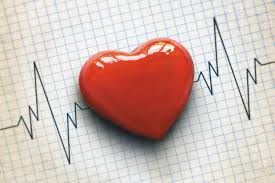

# LIBRARIES IMPORT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors
from mlxtend.plotting import plot_decision_regions

# IMPORT DATASET

In [2]:
# read the data using pandas dataframe
data= pd.read_csv('heart.csv')

In [3]:
#Showing First 5 Rows of dataset
data.head()
#OBSERVATION-Pretty even mix between discrete and continuous variables

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
#Showing Last 5 Rows of dataset
data.tail()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# EXPLORE/VISUALIZE DATASET =>EXPLORATORY DATA ANALYSIS

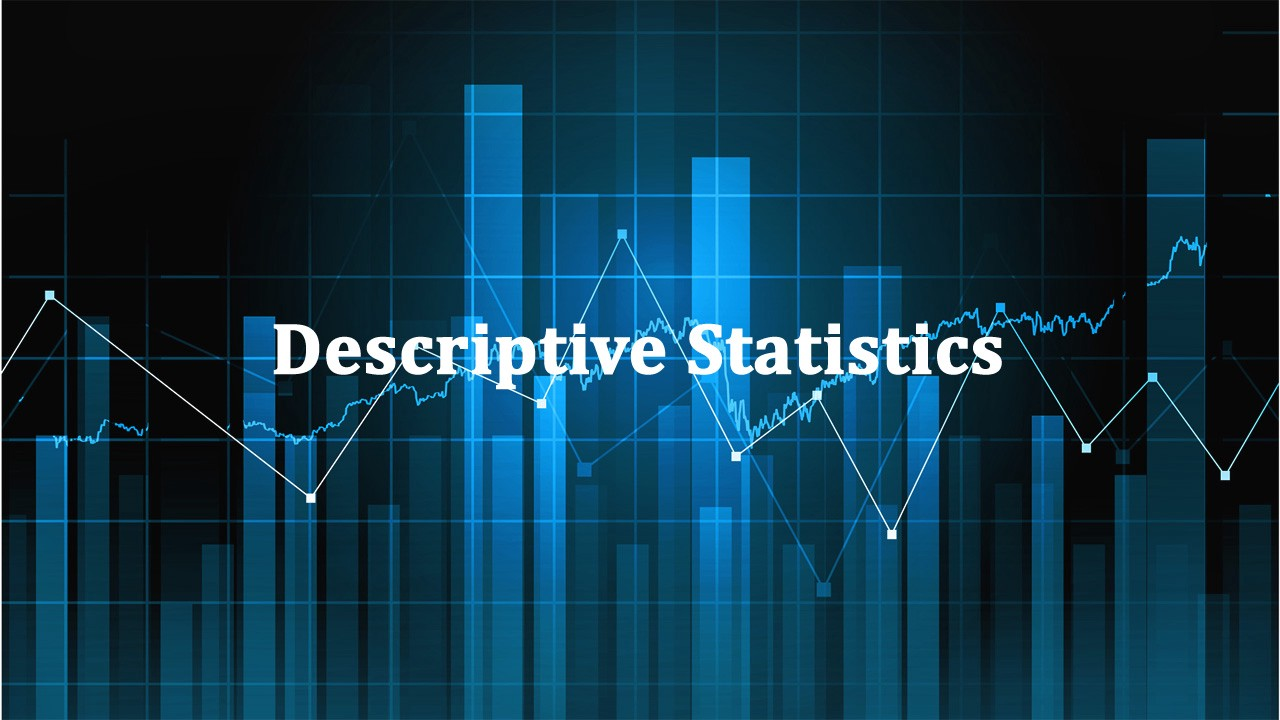
Descriptive statistics are used to describe or summarize data in ways that are meaningful and useful.

In [5]:
#dimensions
print('Number of rows in the dataset: ',data.shape[0])
print('Number of columns in the dataset: ',data.shape[1])

Number of rows in the dataset:  303
Number of columns in the dataset:  14


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


CHECKING MISSING VALUE

In [7]:
data.isna().sum() #no missing values

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
data.nunique() #number of unique values in each attribute

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

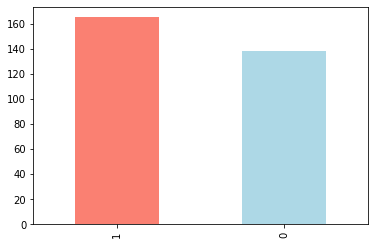

In [9]:
data.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

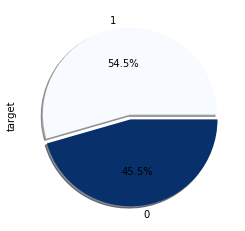

In [10]:
data.target.value_counts().plot.pie(autopct='%1.1f%%',shadow=True,explode=[0.005,0.05],cmap='Blues')


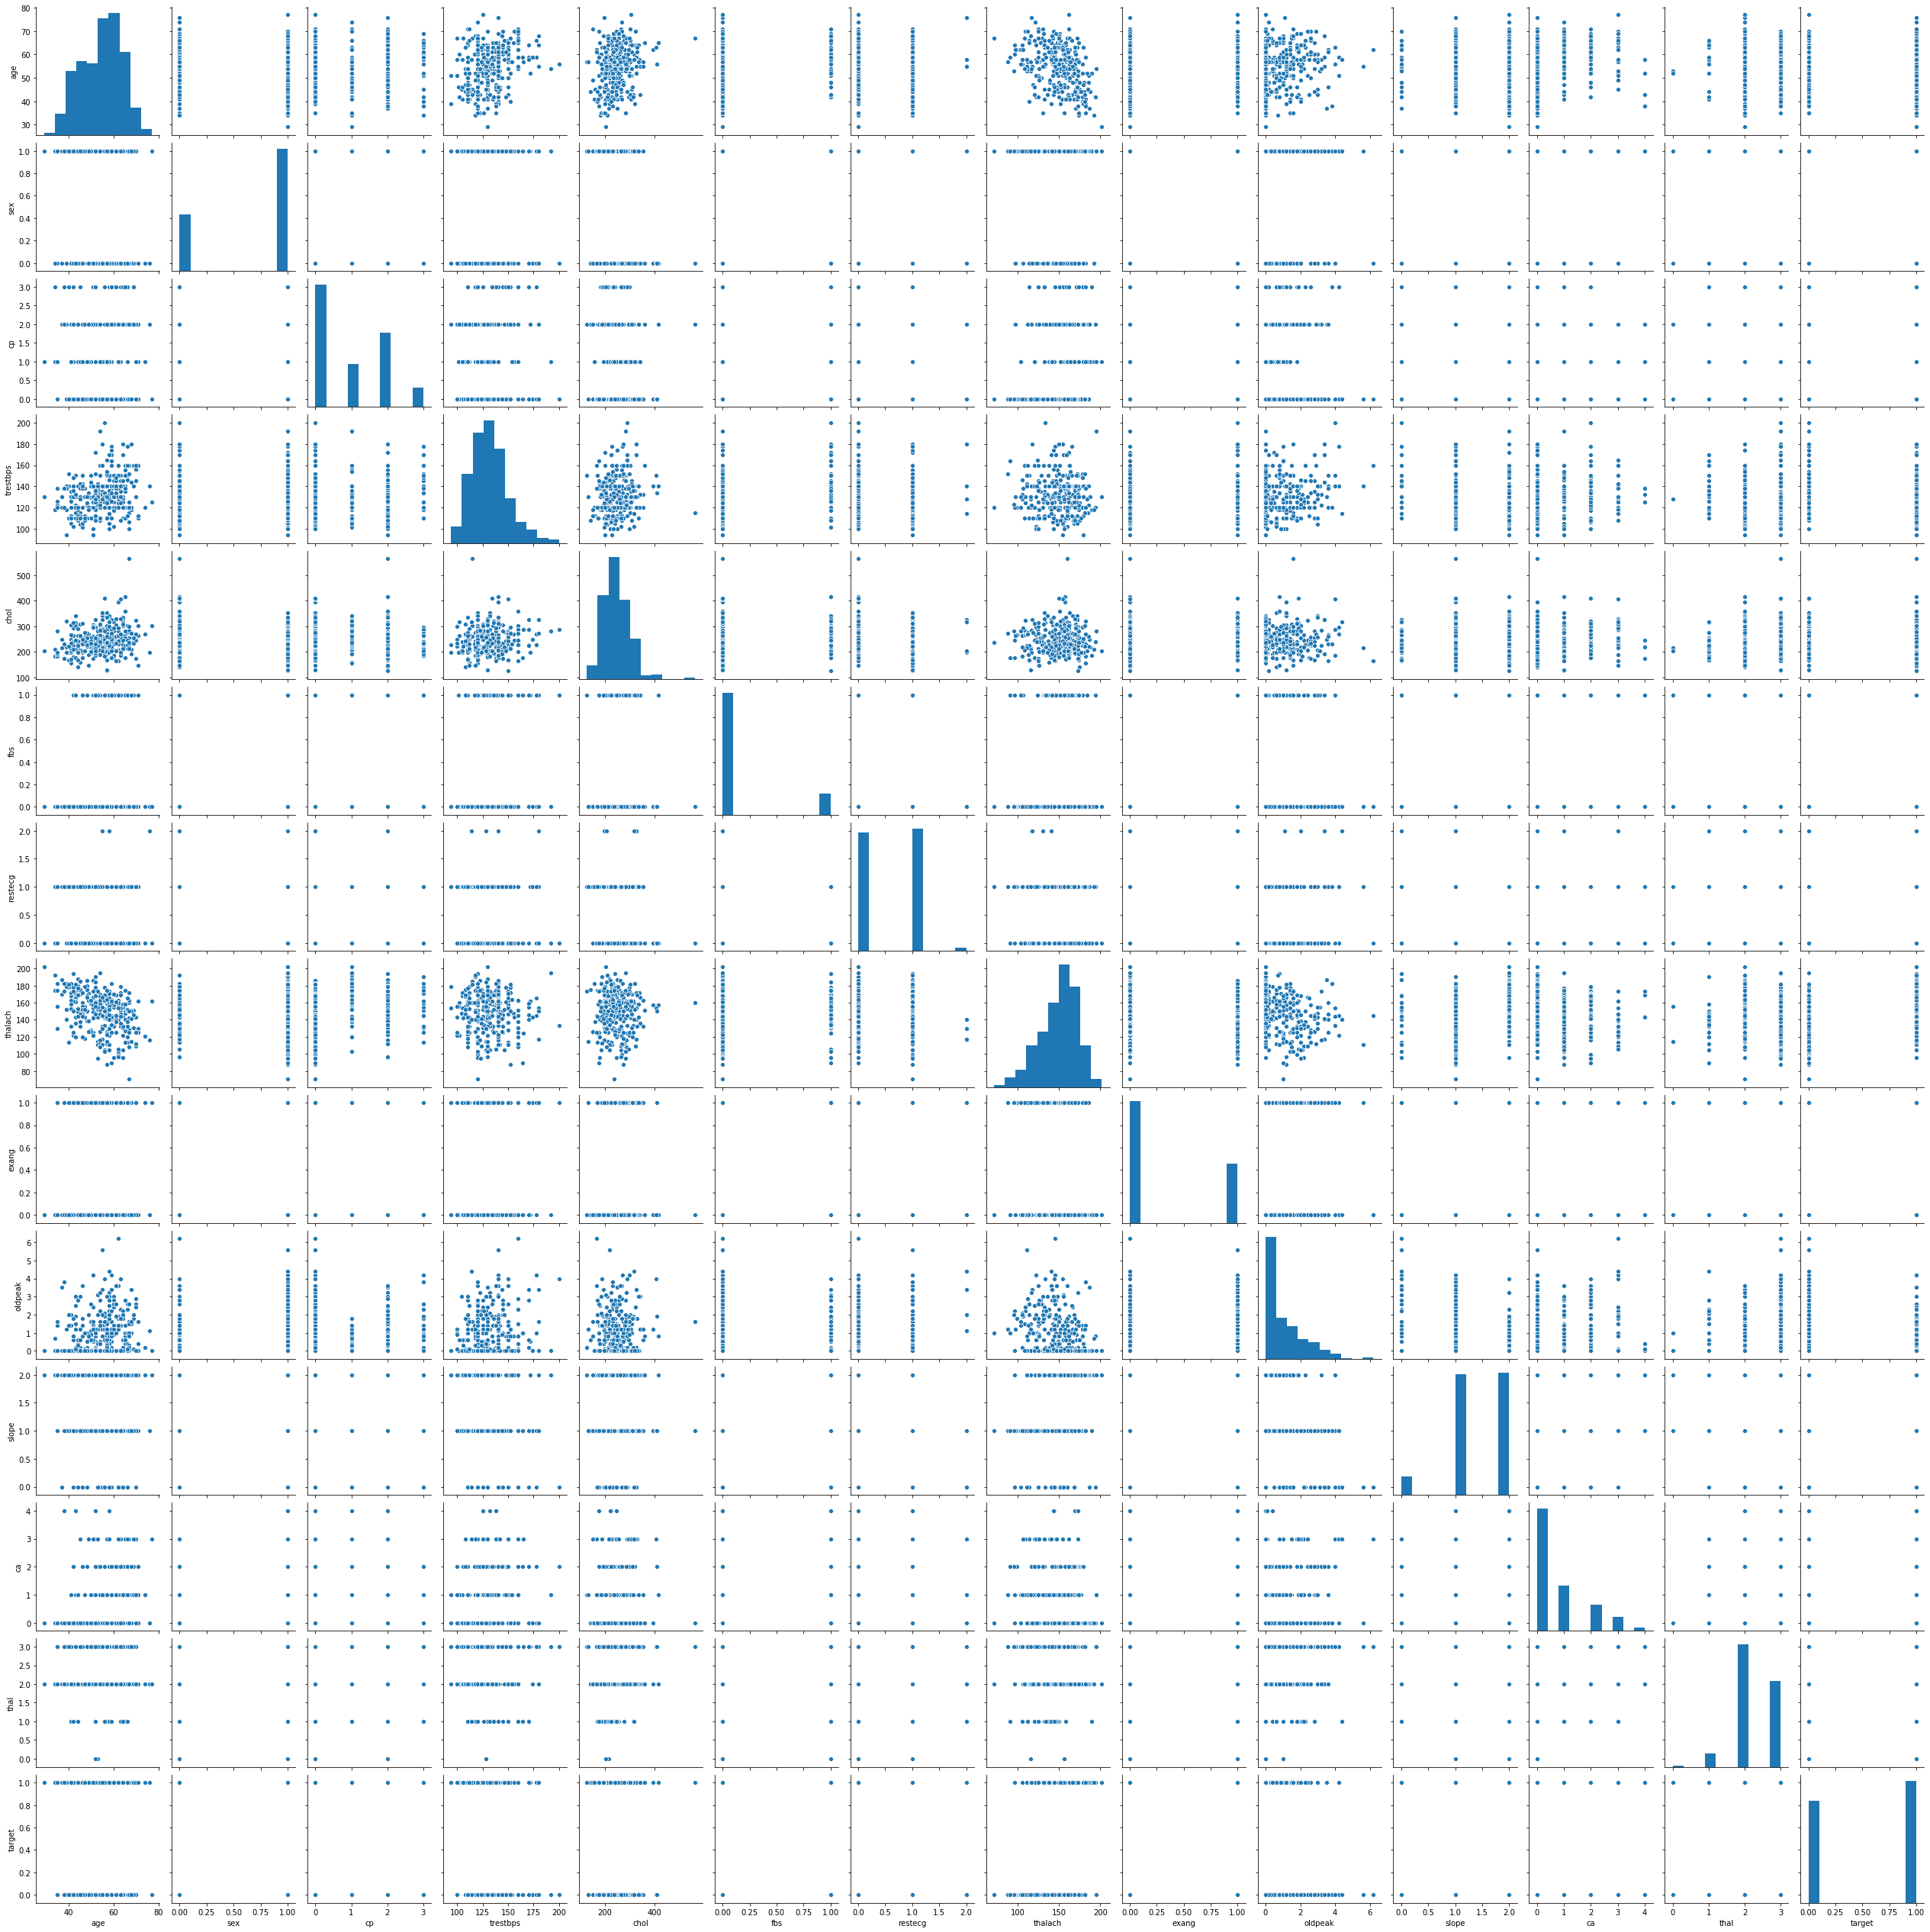

In [11]:
sns.pairplot(data)
#The pairs plot builds on two basic figures, the histogram and the scatter plot.

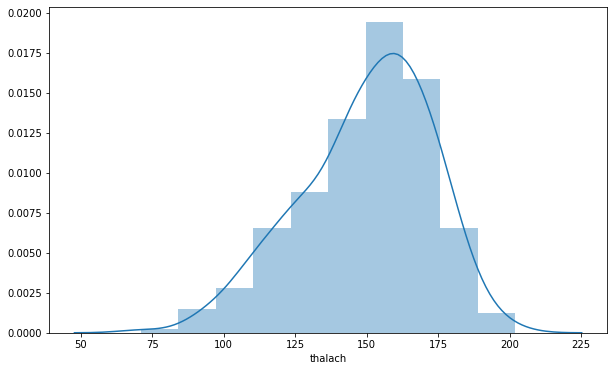

In [12]:
f, ax = plt.subplots(figsize=(10,6))
x = data['thalach']
ax = sns.distplot(x, bins=10)
plt.show()
#thalach variable is slightly negatively skewed.

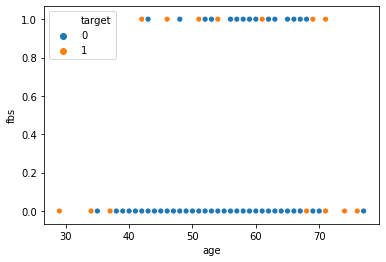

In [13]:
sns.scatterplot(data['age'],data['fbs'],hue=data['target'])
#if fbs>120=1
#this shows that people who have controlled blood sugar levels,have lesser chance of having heart disease

In [14]:
young_ages=data[(data.age>=29)&(data.age<40)]
middle_ages=data[(data.age>=40)&(data.age<55)]
elderly_ages=data[(data.age>55)]
print('Young Ages :',len(young_ages))
print('Middle Ages :',len(middle_ages))
print('Elderly Ages :',len(elderly_ages))


Young Ages : 16
Middle Ages : 128
Elderly Ages : 151


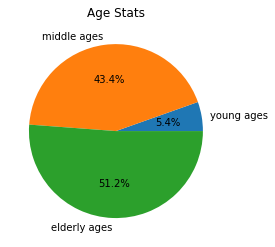

In [15]:
plt.pie([len(young_ages),len(middle_ages),len(elderly_ages)],labels=['young ages','middle ages','elderly ages'], autopct='%1.1f%%')
plt.title('Age Stats')
plt.show()


Male : 207
Female : 96


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  


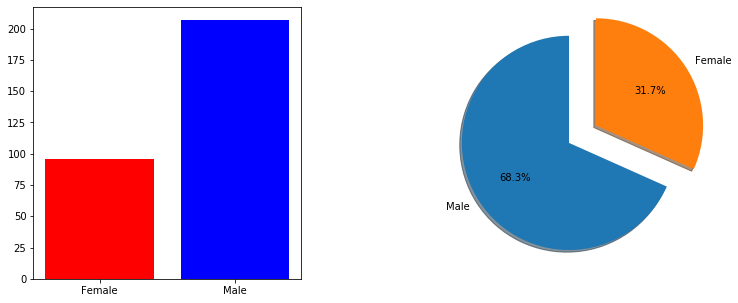

In [16]:
male_count = data.sex.value_counts().tolist()[0]
female_count = data.sex.value_counts().tolist()[1]
print('Male :',male_count)
print('Female :',female_count)
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (12,5),constrained_layout=True)
plt.subplots_adjust(wspace = 0.5)

ax1.bar(data.sex.unique(),data.sex.value_counts(),color = ['blue','red'],width = 0.8)
ax1.set_xticks(data.sex.unique())
ax1.set_xticklabels(('Male','Female'))

ax2.pie((male_count,female_count), labels = ('Male','Female'), autopct='%1.1f%%', shadow=True, startangle=90, explode=[0,0.3])

plt.show()

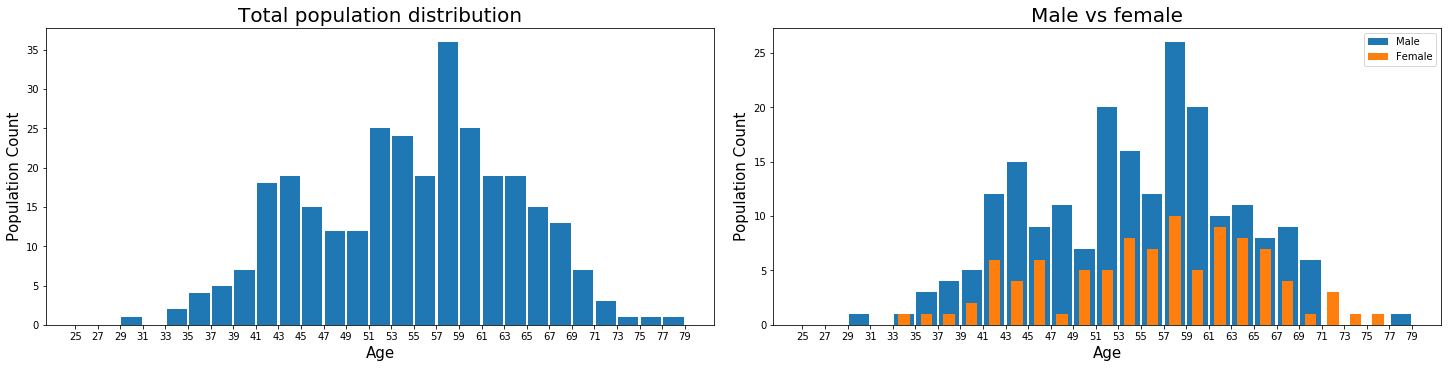

In [17]:
# Population Distribution with age and sex

fig, (ax1,ax2) = plt.subplots(1,2, figsize = (20,5),constrained_layout=True)
bin_x = range(25,80,2)

ax1.hist(data.age.tolist(),bins=bin_x,rwidth=0.9)
ax1.set_xticks(range(25,80,2))
ax1.set_xlabel('Age',fontsize=15)
ax1.set_ylabel('Population Count',fontsize=15)
ax1.set_title('Total population distribution',fontsize=20)

ax2.hist(data[data['sex']==1].age.tolist(),label = 'Male',bins=bin_x,rwidth=0.9)
ax2.hist(data[data['sex']==0].age.tolist(),label = 'Female',bins=bin_x,rwidth=0.5)
ax2.legend()
ax2.set_xticks(range(25,80,2))
ax2.set_xlabel('Age',fontsize=15)
ax2.set_ylabel('Population Count',fontsize=15)
ax2.set_title('Male vs female',fontsize=20)

plt.show()

Text(0.5, 1.0, 'People According to Chestpain Type')

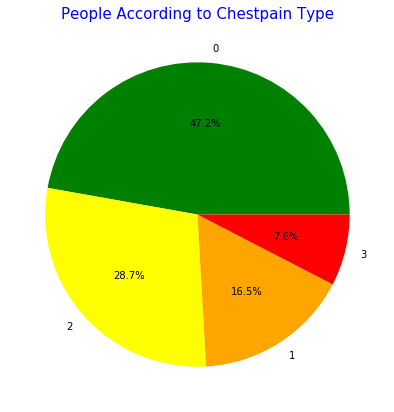

In [18]:
labels = data.cp.value_counts().index
colors = ['green','yellow','orange','red']
sizes = data.cp.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes,labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('People According to Chestpain Type',color = 'blue',fontsize = 15)

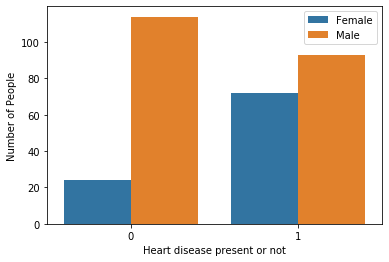

In [19]:
sns.countplot(x = 'target',data = data,hue = 'sex')
plt.xlabel('Heart disease present or not')
plt.ylabel('Number of People')
plt.legend(['Female','Male']);
#So we can see that clearly more number of men are suffering from heart diseases as compared to women.


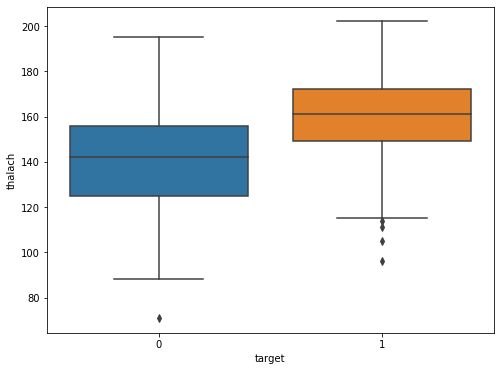

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="thalach", data=data)
plt.show()
#The boxplot confirms  people suffering from heart disease (target = 1) have relatively higher heart rate
#This is a good feature for model

In [21]:
a=data[data['target']==1]
b=data[data['target']==0]
print("Total =", len(data))

print("Number of people who had disease =", len(a))
print("Percentage  =", 1.*len(a)/len(data)*100.0, "%")
 
print("Number of people who didnt have disease =", len(b))
print("Percentage  =", 1.*len(b)/len(data)*100.0, "%")

Total = 303
Number of people who had disease = 165
Percentage  = 54.45544554455446 %
Number of people who didnt have disease = 138
Percentage  = 45.54455445544555 %


> >>># APPLYING REGRESSION MODELS

In [22]:
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


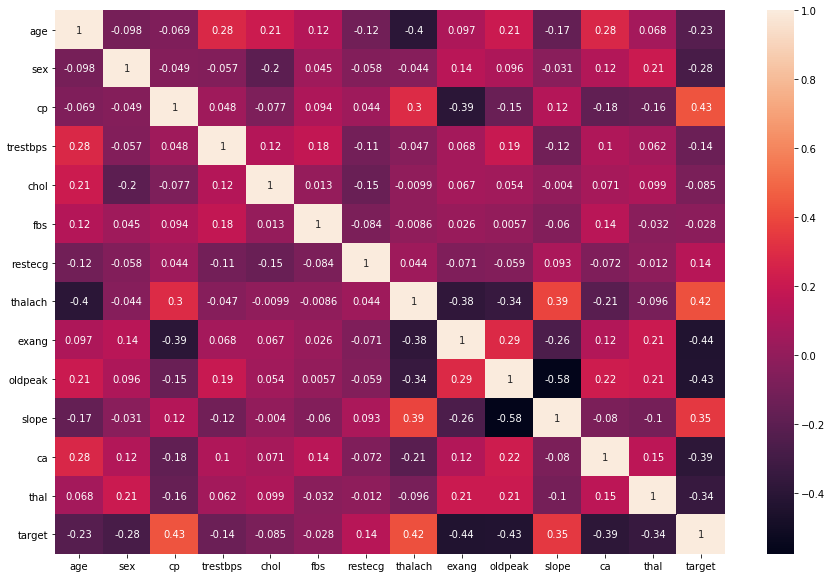

In [23]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True) 

In [24]:
data.drop(['age','sex','trestbps','chol','fbs','restecg','exang','oldpeak','slope','ca','thal'],axis=1,inplace=True)

In [25]:
X = data.drop('target',axis=1).values
y = data['target'].values

In [26]:
data

,cp,thalach,target
0,3,150,1
1,2,187,1
2,1,172,1
3,1,178,1
4,0,163,1
...,...,...,...
298,0,123,0
299,3,132,0
300,0,141,0
301,0,115,0


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler() #standardisation to avoid misclassification
X = sc.fit_transform(X)
##feature matrix is scaled,y is not scaled because it contains only 0 or 1 value 

 MODEL TRAINING

In [28]:
from sklearn.model_selection import train_test_split

In [29]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=65)


In [30]:
X_train

array([[ 1.97312292, -0.81543681],
       [ 1.00257707,  0.97751389],
       [ 1.97312292, -0.24694024],
       [-0.93851463, -1.82123842],
       [ 1.97312292,  0.54020884],
       [ 1.00257707,  1.10870541],
       [-0.93851463, -1.95242994],
       [-0.93851463, -0.85916731],
       [-0.93851463, -2.21481297],
       [ 0.03203122,  0.1466343 ],
       [ 1.97312292, -1.07781984],
       [ 0.03203122, -0.37813176],
       [ 1.00257707,  0.84632238],
       [ 1.00257707,  0.1029038 ],
       [-0.93851463, -0.29067075],
       [-0.93851463, -0.33440125],
       [-0.93851463, -2.03989095],
       [-0.93851463,  0.40901733],
       [-0.93851463,  0.19036481],
       [-0.93851463, -0.37813176],
       [-0.93851463, -0.42186226],
       [ 1.00257707,  0.32155632],
       [-0.93851463,  0.1029038 ],
       [-0.93851463, -0.33440125],
       [-0.93851463, -0.50932327],
       [ 0.03203122,  0.27782582],
       [ 0.03203122,  0.54020884],
       [-0.93851463, -1.69004691],
       [-0.93851463,

In [31]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

# -----------------------------------MODEL 1:LOGISTIC REGRESSION--------------------------

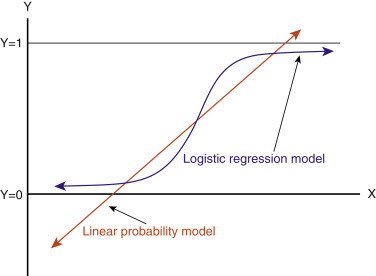
SIGMOID FUNCTION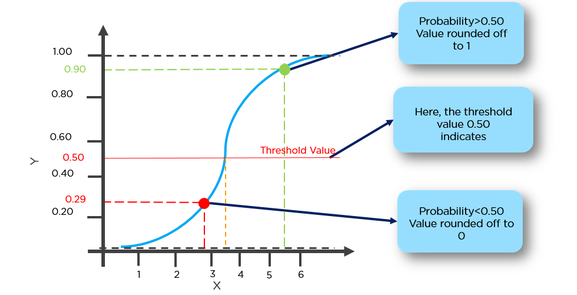

 WHY IS LOGISTIC REGRESSION A CLAFFICATION MODEL BUT IT IS NAMED REGRESSION

The dependent variable is categorical (in linear regression it is continuous), which is why it’s considered a classification algorithm.
Regression because predictors are used to predict the outcome i.e we are finding relationship.

In [32]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

MODEL TESTING

In [33]:
#checking train accuracy  
y_proba = classifier.predict_proba(X_train)
y_proba

array([[0.23541477, 0.76458523],
       [0.15950282, 0.84049718],
       [0.17238299, 0.82761701],
       [0.85317062, 0.14682938],
       [0.10812819, 0.89187181],
       [0.14777906, 0.85222094],
       [0.86411347, 0.13588653],
       [0.74993292, 0.25006708],
       [0.88393928, 0.11606072],
       [0.41533125, 0.58466875],
       [0.26941482, 0.73058518],
       [0.50470311, 0.49529689],
       [0.17196899, 0.82803101],
       [0.25718936, 0.74281064],
       [0.66982802, 0.33017198],
       [0.67644291, 0.32355709],
       [0.87102074, 0.12897926],
       [0.55635073, 0.44364927],
       [0.59307463, 0.40692537],
       [0.682988  , 0.317012  ],
       [0.68946147, 0.31053853],
       [0.22953222, 0.77046778],
       [0.60750122, 0.39249878],
       [0.67644291, 0.32355709],
       [0.70218683, 0.29781317],
       [0.39360957, 0.60639043],
       [0.35147645, 0.64852355],
       [0.84150819, 0.15849181],
       [0.68946147, 0.31053853],
       [0.78729734, 0.21270266],
       [0.

In [34]:
y_predict_train = classifier.predict(X_train)
y_predict_train
#we are checking if our model is trained correctly

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1],
      dtype=int64)

In [35]:
y_train

array([1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0],
      dtype=int64)

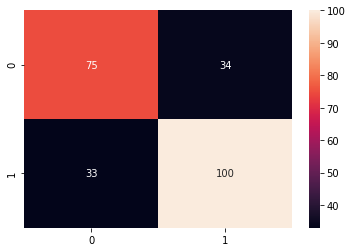

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True, fmt="d")

In [37]:
#predict test test set results
y_predict_test = classifier.predict(X_test)
y_predict_test

array([1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0], dtype=int64)

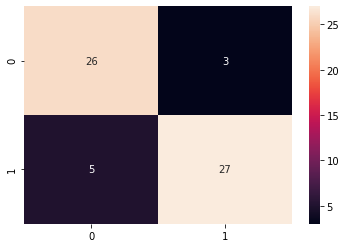

In [38]:
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True, fmt="d")

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [40]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_predict_test)
accuracy

0.8688524590163934

VISUALIZING TRAINING AND TESTING DATASETS

In [41]:

# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train

# Create a meshgrid ranging from the minimum to maximum value for both features

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),#chest pain
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))#thalach
#+1 and -1 done so that points are not squeezed.

In [42]:
y_train.shape #independent variable

(242,)

In [43]:
X1.shape #feature vector

(773, 492)

(-4.4392671031844095, 3.280732896815426)

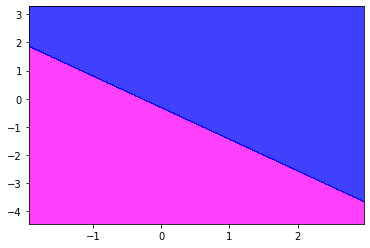

In [44]:
# plot the boundary using the trained classifier
#plot all pixels
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
#contour is used to make a separation between 2 colour which represent 
# If classified as 0 it will be magenta, and if it is classified as 1 it will be shown in blue .
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
#equal target distribution

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


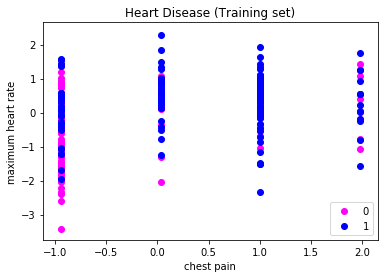

In [45]:
# plot all the actual training points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
    
plt.title('Heart Disease (Training set)')
plt.xlabel('chest pain')
plt.ylabel('maximum heart rate')
plt.legend()
plt.show()
#chest pain of normalised type 0 and 1 have blue colour :-have heart disease

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


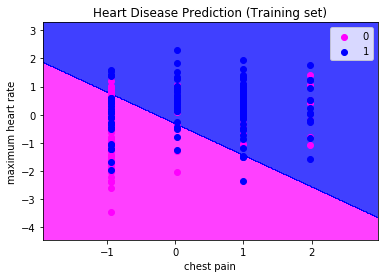

In [46]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j)
plt.title('Heart Disease Prediction (Training set)')
plt.xlabel('chest pain')
plt.ylabel('maximum heart rate')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


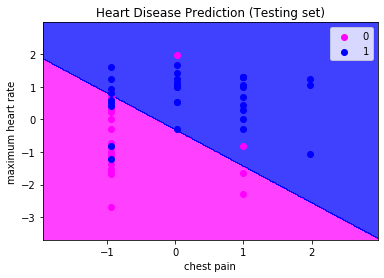

In [47]:
from matplotlib.colors import ListedColormap #colorise datapoints
X_set, y_set = X_test, y_test 
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),#for chest pain
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))#for heart rate
#all the pixels are plotted

plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('magenta', 'blue')))
#boundary btw prediction regions
#we apply our classifier on all model
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('magenta', 'blue'))(i), label = j) #plotted data points
plt.title('Heart Disease Prediction (Testing set)')
plt.xlabel('chest pain')
plt.ylabel('maximum heart rate')
plt.legend()
plt.show()
##it can be seen that most blue points are present in blue color region which means model did well
#and pink points are seen in pink region
#the points which are blue but present in pink region depicts incorrect predictions made by model
#points on plot are our training set observation points
#each record is characterised by chest pain and maximum heart rate of the person.
#blue points show presence of heart disease,whereas pink shows absense.
#when max heart rate and high chest pain is there,more are the chances of heart disease.
#this line in middle is seperator

# ...........................MODEL 2:LINEAR REGRESSION..........................................

In [48]:
data=pd.read_csv("heart.csv")
chol_X=data['chol']
X1=pd.DataFrame(chol_X)
X1

,chol
0,233
1,250
2,204
3,236
4,354
...,...
298,241
299,264
300,193
301,131


In [49]:
age_y=data['age']
y1=pd.DataFrame(age_y)
y1.head()

,age
0,63
1,37
2,41
3,56
4,57


In [50]:
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2)

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [52]:
result=model.fit(X1_train,y1_train)

In [53]:
y1_pred = model.predict(X1_test)

In [54]:
print("Coefficient of the model:",model.score(X1_test,y1_test))
print('intercept:', model.intercept_)

Coefficient of the model: 0.04725977161943906
intercept: [45.4131874]


In [55]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: {}".format(mean_squared_error(y1_test, y1_pred)))

Mean squared error: 78.70489473836169


In [56]:
print("r2 score: {}".format(r2_score(y1_test,y1_pred)))

r2 score: 0.04725977161943906


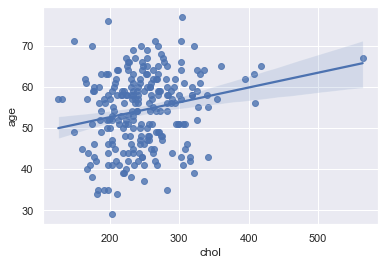

In [57]:
sns.set(color_codes=True)
dataframe_training = pd.DataFrame()
dataframe_training['chol'] = X1_train['chol']
dataframe_training['age'] = y1_train
ax = sns.regplot(x="chol", y="age", data= dataframe_training)
#The above plot confirms that there is a slighly positive correlation between age and chol variables.
#regression model Line of Best Fit

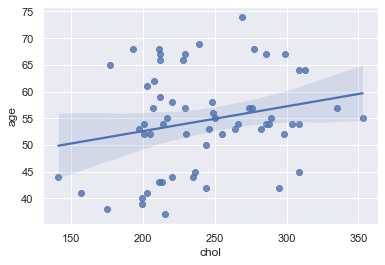

In [58]:
sns.set(color_codes=True)
dataframe_testing = pd.DataFrame()
dataframe_testing['chol'] = X1_test['chol']
dataframe_testing['age'] = y1_test
ax = sns.regplot(x="chol", y="age", data= dataframe_testing)

In [59]:
import statsmodels.api as sm
x = sm.add_constant(X1)

In [60]:
results = sm.OLS(endog = y1, exog=x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    age   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     14.40
Date:                Wed, 06 May 2020   Prob (F-statistic):           0.000179
Time:                        22:06:12   Log-Likelihood:                -1090.9
No. Observations:                 303   AIC:                             2186.
Df Residuals:                     301   BIC:                             2193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1457      2.483     18.183      0.000      40.260      50.032
chol           0.0374      0.010      3.795      0.000       0.018       0.057
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.244
Skew:                          -0.113   Prob(JB):                        0.120
Kurtosis:                       2.466   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# .............................MODEL 3:POLYNOMIAL REGRESSION..............................

In [61]:
X1 = np.array(X1).reshape(-1, 1)
y1 = np.array(y1).reshape(-1, 1) 
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size = 0.2)

In [62]:
from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()
linear_regressor.fit(X1,y1)
 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_regressor = PolynomialFeatures(degree = 4) 
X_polynomial = polynomial_regressor.fit_transform(X1)
linear_regressor_2 = LinearRegression()
linear_regressor_2.fit(X_polynomial, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

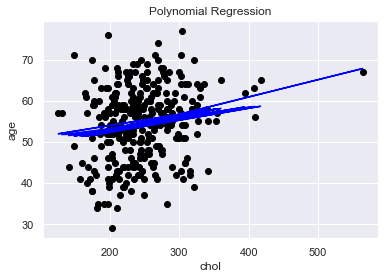

In [64]:
plt.scatter(X1, y1, color = 'black')
plt.plot(X1, linear_regressor_2.predict(polynomial_regressor.fit_transform(X1)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('chol')
plt.ylabel('age')
plt.show()

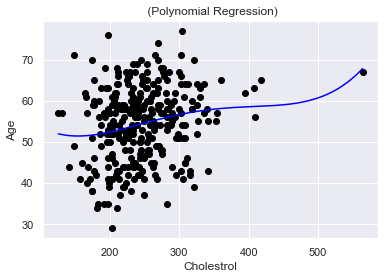

In [65]:
X_grid = np.arange(min(X1), max(X1), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X1, y1, color = 'black')
plt.plot(X_grid, linear_regressor_2.predict(polynomial_regressor.fit_transform(X_grid)), color = 'blue')
plt.title(' (Polynomial Regression)')
plt.xlabel('Cholestrol')
plt.ylabel('Age')
plt.show()

In [66]:
print("Coefficient of the model:",model.score(X1_test,y1_test))
print('intercept:', model.intercept_)

Coefficient of the model: -0.03294674277341181
intercept: [45.4131874]


In [67]:
y1_pred = model.predict(X1_test)

In [68]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: {}".format(mean_squared_error(y1_test, y1_pred)))

Mean squared error: 77.69724908219573


In [70]:
import statsmodels.api as sm
x = sm.add_constant(X1)

In [71]:
results = sm.OLS(endog = y1, exog=x).fit()
results.summary()
#R SQUARE=0.046

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     14.40
Date:                Wed, 06 May 2020   Prob (F-statistic):           0.000179
Time:                        22:06:13   Log-Likelihood:                -1090.9
No. Observations:                 303   AIC:                             2186.
Df Residuals:                     301   BIC:                             2193.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         45.1457      2.483     18.183      0.000      40.260      50.032
x1             0.0374      0.010      3.795      0.000       0.018       0.057
==============================================================================
Omnibus:                        6.644   Durbin-Watson:                   1.934
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                4.244
Skew:                          -0.113   Prob(JB):                        0.120
Kurtosis:                       2.466   Cond. No.                     1.22e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

>>> # APPLYING CLASSIFICATION MODELS

# .....................................MODEL 1:NAIVE BAYES.............................................

In [72]:
data=pd.read_csv("heart.csv")

In [73]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [74]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [76]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
classifier = GaussianNB()
classifier.fit(X_train, y_train)
best_accuracy = [] # in order to compare all results, I will create an empty list that will be filled after all tests.
best_accuracy.append(classifier.score(X_test,y_test))

In [77]:
y_predI = classifier.predict(X_test)

In [78]:
print('Accuracy Score:')
print(metrics.accuracy_score(y_test,y_predI))

Accuracy Score:
0.8688524590163934


In [79]:
#F1 Score with Precision and Recall
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predI)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



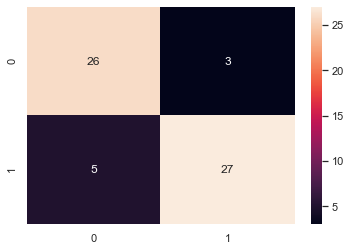

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
cm_nb = confusion_matrix(y_test, y_predI)
sns.heatmap(cm_nb, annot=True, fmt="d")

In [81]:
#auc curve
from sklearn import model_selection
seed = 5
kfold = model_selection.KFold(n_splits=10, random_state=seed)
scoring = 'accuracy'
results = model_selection.cross_val_score(classifier, X, y, cv=kfold, scoring=scoring)
print(results)
print(results.mean())
print(results.std())

[0.80645161 0.90322581 0.87096774 0.83333333 0.86666667 0.76666667
 0.76666667 0.86666667 0.8        0.56666667]
0.8047311827956989
0.0906512198386011


C:\Users\User\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


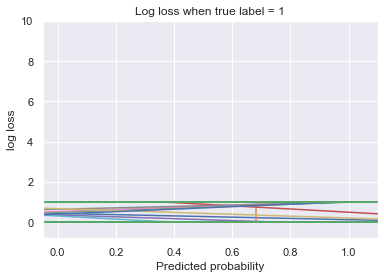

In [82]:

# Visualize log loss for a large number 
from sklearn.metrics import log_loss 

plt.plot(X,y)
plt.axis([-0.05,1.1, -.8, 10])
plt.title("Log loss when true label = 1")
plt.xlabel("Predicted probability")
plt.ylabel("log loss")

plt.show()

# MODEL 2:SVM(SUPPORT VECTOR MACHINE)

In [83]:
data1=pd.read_csv("heart.csv")


In [84]:
data1.drop(['age','sex','trestbps','chol','fbs','restecg','exang','oldpeak','slope','ca','thal'],axis=1,inplace=True)


In [85]:
data1

,cp,thalach,target
0,3,150,1
1,2,187,1
2,1,172,1
3,1,178,1
4,0,163,1
...,...,...,...
298,0,123,0
299,3,132,0
300,0,141,0
301,0,115,0


In [86]:
Xi= data1.drop('target',axis=1).values
yi= data1['target'].values

In [87]:
Xi

array([[  3, 150],
       [  2, 187],
       [  1, 172],
       [  1, 178],
       [  0, 163],
       [  0, 148],
       [  1, 153],
       [  1, 173],
       [  2, 162],
       [  2, 174],
       [  0, 160],
       [  2, 139],
       [  1, 171],
       [  3, 144],
       [  3, 162],
       [  2, 158],
       [  2, 172],
       [  3, 114],
       [  0, 171],
       [  3, 151],
       [  0, 161],
       [  2, 179],
       [  0, 178],
       [  2, 137],
       [  3, 178],
       [  1, 162],
       [  2, 157],
       [  2, 123],
       [  2, 157],
       [  2, 152],
       [  1, 168],
       [  0, 140],
       [  1, 188],
       [  2, 152],
       [  3, 125],
       [  2, 160],
       [  2, 170],
       [  2, 165],
       [  2, 148],
       [  2, 151],
       [  2, 142],
       [  1, 180],
       [  0, 148],
       [  0, 143],
       [  2, 182],
       [  1, 172],
       [  2, 180],
       [  2, 156],
       [  2, 115],
       [  0, 160],
       [  2, 149],
       [  0, 151],
       [  2,

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(Xi)
Xi = scaler.transform(Xi)

In [89]:
from sklearn.model_selection import train_test_split
Xi_train, Xi_test, yi_train, yi_test = train_test_split(Xi, yi, test_size=0.2, random_state=42)

In [90]:
from sklearn import svm

In [91]:
svm_cls=svm.SVC(kernel='rbf')
svm_cls.fit(Xi_train,yi_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [92]:
svm_pred=svm_cls.predict(Xi_test)

In [93]:
from sklearn.metrics import confusion_matrix
conf_matSVM=confusion_matrix(yi_test,svm_pred)
conf_matSVM

array([[25,  4],
       [ 5, 27]], dtype=int64)

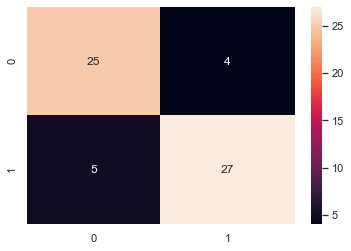

In [94]:
from sklearn.metrics import classification_report, confusion_matrix
cm1= confusion_matrix(yi_test,svm_pred)
sns.heatmap(cm1, annot=True, fmt="d")

In [95]:
from sklearn.metrics import classification_report
print(classification_report(yi_test,svm_pred))
best_accuracy.append(svm_cls.score(Xi_test,yi_test))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85        29
           1       0.87      0.84      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



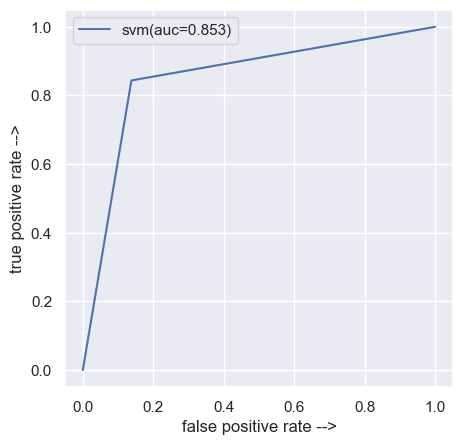

In [96]:
#from sklearn.metrics import roc_curve_score
from sklearn.metrics import roc_curve,auc

svm_fpr, svm_tpr, thresholds = roc_curve(y_test,svm_pred)
auc_svm=auc(svm_fpr,svm_tpr)



plt.figure(figsize=(5,5),dpi=100)

plt.plot(svm_fpr,svm_tpr,linestyle='-',label='svm(auc=%0.3f)'%auc_svm)
plt.xlabel("false positive rate -->")
plt.ylabel("true positive rate -->")
plt.legend()
plt.show()

In [97]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(yi_test,svm_pred)*100)    

Accuracy is: 85.24590163934425


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


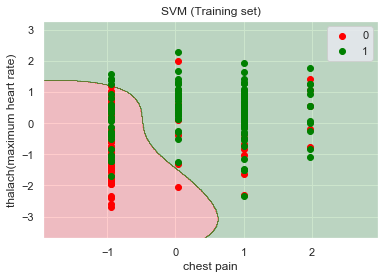

In [98]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = Xi_train, yi_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Training set)')
plt.xlabel('chest pain')
plt.ylabel('thalach(maximum heart rate)')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


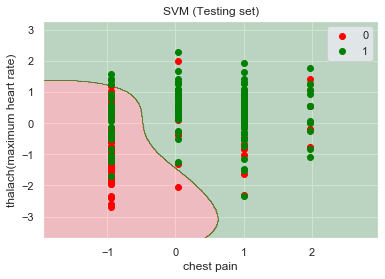

In [99]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = Xi_train, yi_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, svm_cls.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('chest pain')
plt.ylabel('thalach(maximum heart rate)')
plt.legend()
plt.show()

# MODEL 3:DECISION TREE

In [100]:
data=pd.read_csv("heart.csv")

In [101]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [102]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.787


The accuracy on the training set is 100%, while the test set accuracy is much worse. This is an indicative that the tree is overfitting and not generalizing well to new data. Therefore, we need to apply pre-pruning to the tree.

We set max_depth=3, limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set.

In [103]:
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
tree.fit(X_train, y_train)    
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))
best_accuracy.append(tree.score(X_test,y_test))

Accuracy on training set: 0.847
Accuracy on test set: 0.820


In [104]:
y_predict1 = tree.predict(X_test)

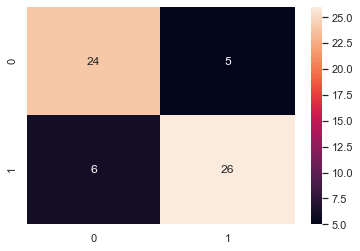

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
cm_dt= confusion_matrix(y_test, y_predict1)
sns.heatmap(cm_dt, annot=True, fmt="d")

In [106]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_predict1)
print(report)

              precision    recall  f1-score   support

           0       0.80      0.83      0.81        29
           1       0.84      0.81      0.83        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



In [107]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_predict1)*100) 

Accuracy is: 81.9672131147541


In [108]:
#Feature Importance in Decision Trees

print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.06165909 0.         0.42078044 0.01859135 0.         0.
 0.         0.         0.14088288 0.12732636 0.05102503 0.17973484
 0.        ]


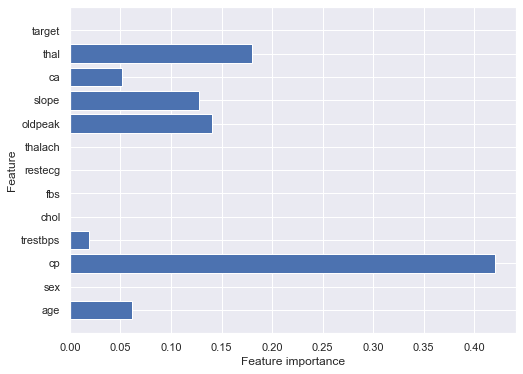

In [109]:
dis_ft = [x for i,x in enumerate(data.columns) if i!=8]
def plot_feature_importances(model):
    plt.figure(figsize=(8,6))
    n_features = 13
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), dis_ft)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
plot_feature_importances(tree)
plt.savefig('feature_importance')

In [110]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz 
ydec = data['target']

#Load X Variables into a Pandas Dataframe with columns 
Xdec = data.drop(['target'], axis = 1)


from sklearn.model_selection import train_test_split
X_train_dec, X_test_dec, y_train_dec, y_test_dec= train_test_split(Xdec, ydec, test_size=0.20, random_state=101)
DT_Model = DecisionTreeClassifier(max_depth=3)
DT_Model.fit(X_train_dec,y_train_dec)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

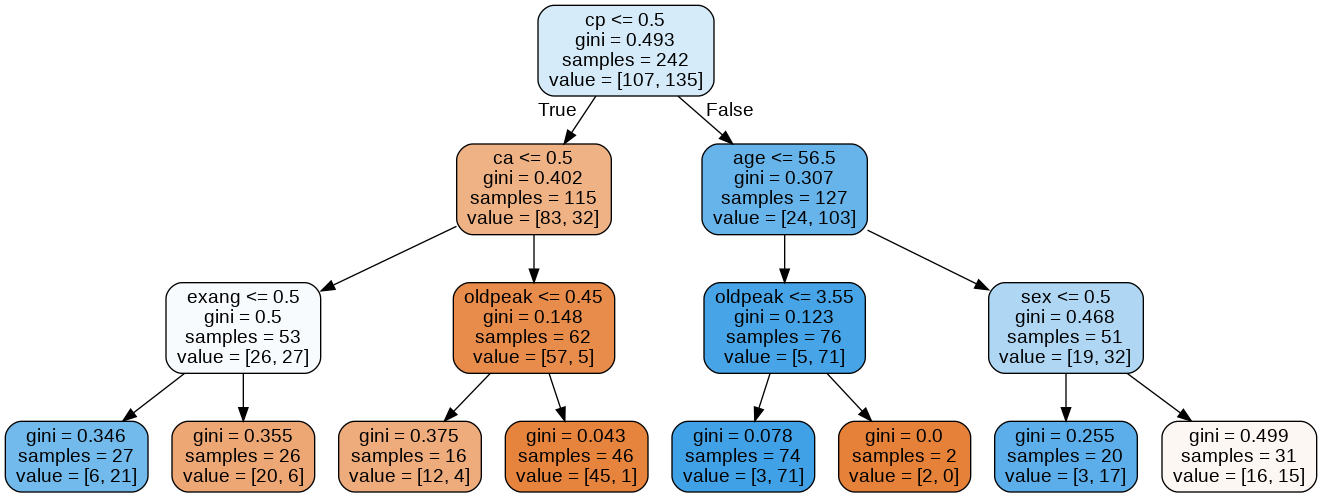

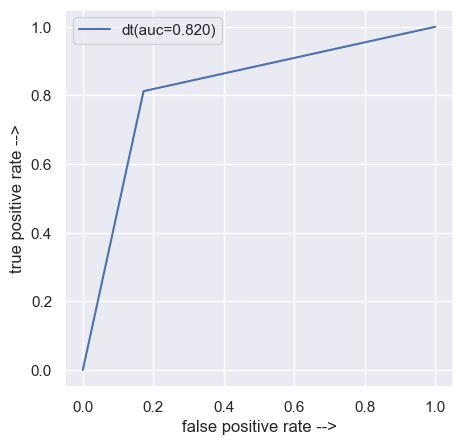

In [111]:
#from sklearn.metrics import roc_curve_score
from sklearn.metrics import roc_curve,auc

dt_fpr, dt_tpr, thresholds = roc_curve(y_test,y_predict1)
auc_dt=auc(dt_fpr,dt_tpr)



plt.figure(figsize=(5,5),dpi=100)

plt.plot(dt_fpr,dt_tpr,linestyle='-',label='dt(auc=%0.3f)'%auc_dt)
plt.xlabel("false positive rate -->")
plt.ylabel("true positive rate -->")
plt.legend()
plt.show()

# MODEL 4:K NEAREST NEIGHBOUR

In [112]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [113]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [114]:
from sklearn.neighbors import KNeighborsClassifier
clf=KNeighborsClassifier(n_neighbors=6)
clf.fit(X_train,y_train)
y_predict2=clf.predict(X_test)      

In [115]:
y_predict2=clf.predict(X_test)                                               
best_accuracy.append(clf.score(X_test,y_test))

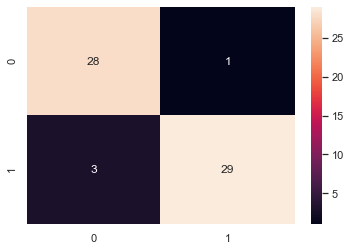

In [116]:
from sklearn.metrics import classification_report, confusion_matrix
cm_KNN= confusion_matrix(y_test, y_predict2)
sns.heatmap(cm_KNN, annot=True, fmt="d")

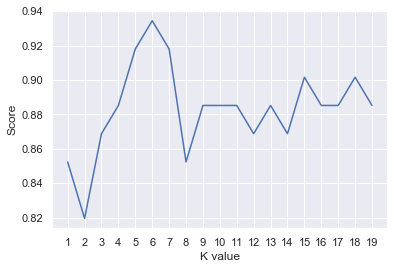

In [117]:
scoreList = []
for i in range(1,20):
    knn2 = KNeighborsClassifier(n_neighbors = i)  # n_neighbors means k
    knn2.fit(X_train, y_train)
    scoreList.append(knn2.score(X_test, y_test))
    
plt.plot(range(1,20), scoreList)
plt.xticks(np.arange(1,20,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

Text(0, 0.5, 'Mean Error')

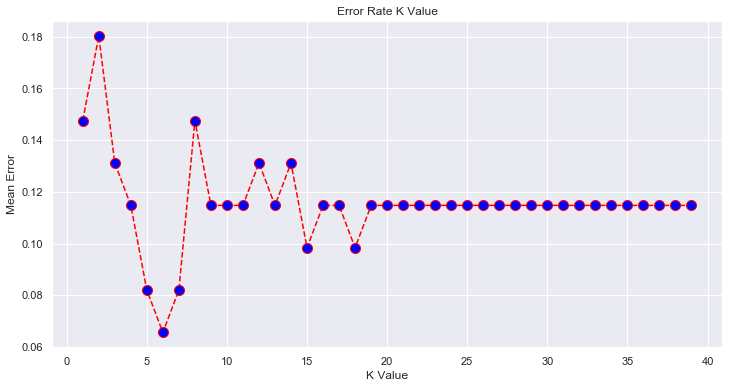

In [118]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [119]:
from sklearn.metrics import accuracy_score
print("Accuracy is:",accuracy_score(y_test,y_predict2)*100)    

Accuracy is: 93.44262295081968


In [120]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict2))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



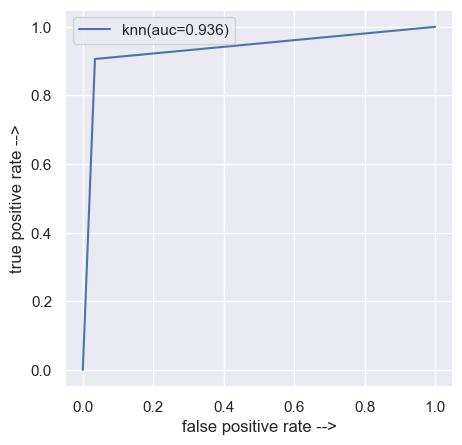

In [121]:
#from sklearn.metrics import roc_curve_score
from sklearn.metrics import roc_curve,auc

knn_fpr, knn_tpr, thresholds = roc_curve(y_test,y_predict2)
auc_knn=auc(knn_fpr,knn_tpr)



plt.figure(figsize=(5,5),dpi=100)

plt.plot(knn_fpr,knn_tpr,linestyle='-',label='knn(auc=%0.3f)'%auc_knn)
plt.xlabel("false positive rate -->")
plt.ylabel("true positive rate -->")
plt.legend()
plt.show()

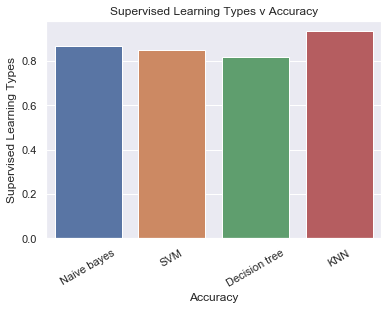

In [124]:
# Bar Plot with Seaborn
sv_ml = ["Naive bayes","SVM","Decision tree","KNN"]
sns.barplot(x = sv_ml, y = best_accuracy)
plt.xticks(rotation= 30)
plt.xlabel('Accuracy')
plt.ylabel('Supervised Learning Types')
plt.title('Supervised Learning Types v Accuracy')
plt.show()

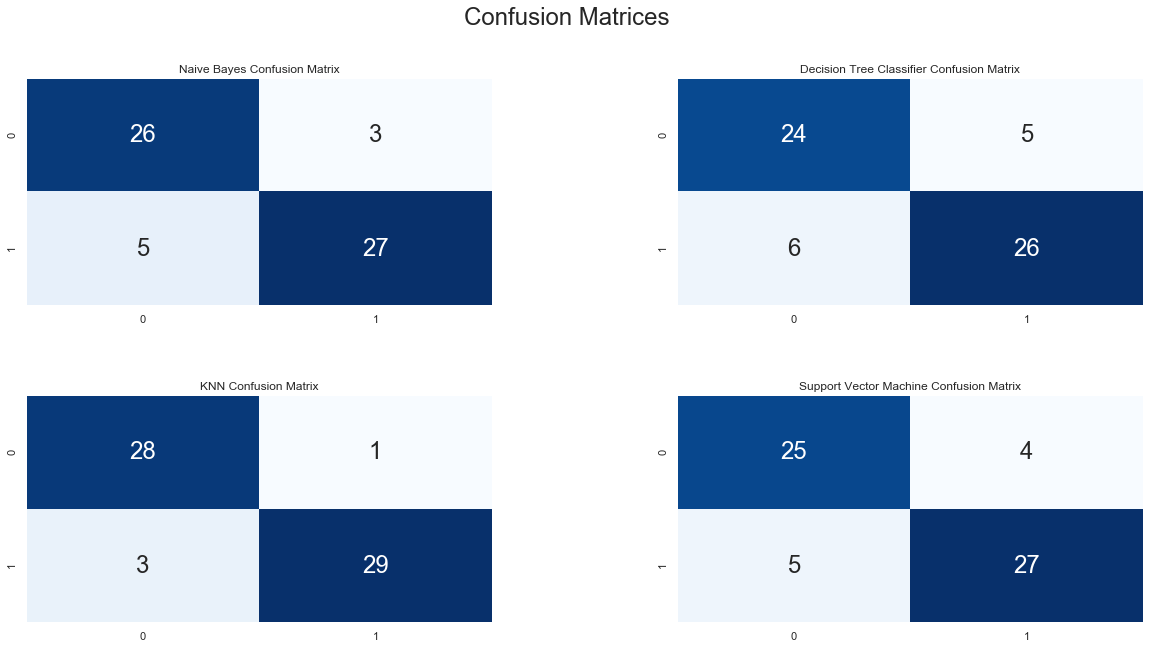

In [123]:
plt.figure(figsize=(20,10))

plt.suptitle("Confusion Matrices",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,2,1)
plt.title("Naive Bayes Confusion Matrix")
sns.heatmap(cm_nb,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,2)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dt,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

plt.subplot(2,2,3)
plt.title("KNN Confusion Matrix")
sns.heatmap(cm_KNN,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})


plt.subplot(2,2,4)
plt.title("Support Vector Machine Confusion Matrix")
sns.heatmap(cm1,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})






plt.show()